<a href="https://colab.research.google.com/github/yenirsmwati/Sentiment-Analysis/blob/main/sentiment_data_hok_raw_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

filepath = r"/content/sample_data/data hok update.csv"
df = pd.read_csv(filepath)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              5000 non-null   object
 1   userName              5000 non-null   object
 2   userImage             5000 non-null   object
 3   content               5000 non-null   object
 4   score                 5000 non-null   int64 
 5   thumbsUpCount         5000 non-null   int64 
 6   reviewCreatedVersion  5000 non-null   object
 7   at                    5000 non-null   object
 8   replyContent          1216 non-null   object
 9   repliedAt             1216 non-null   object
 10  appVersion            5000 non-null   object
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ac5f1687-cce0-4ab7-883c-b9d5766091c8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"butuh pengoptimalan lagi,pas baru buka aplikas...",5,67,9.4.1.5,2024-07-14 07:17:05,NaN,NaN,9.4.1.5
1,ef4f2308-5df0-4dbf-8cec-459c8c501f40,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Berkurang lagi,ntah kenapa setelah rilis ke gl...",1,1821,9.4.1.5,2024-07-12 06:29:46,"Halo pemain, \nMohon maaf atas ketidaknyamanan...",2024-07-14 14:21:56,9.4.1.5
2,23f30613-ee56-4c2c-ac5d-7742e2c3bf40,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sistem kurang nyaman pemain di random terlihat...,2,14,9.4.1.5,2024-07-14 20:10:12,NaN,NaN,9.4.1.5
3,4883c303-6551-414a-8086-87b580d8b450,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,masih baru di mobile. jika sudah banyak perkem...,4,14,9.4.1.5,2024-07-13 16:26:58,NaN,NaN,9.4.1.5
4,50481990-5b6a-4426-afb4-0f59fa3d366f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kadang match tidak terbaca setelah selesai dan...,3,6,9.4.1.5,2024-07-14 13:30:14,NaN,NaN,9.4.1.5


In [ ]:
data = df[["content", "score"]]
data.head()

,content,score
0,"butuh pengoptimalan lagi,pas baru buka aplikas...",5
1,"Berkurang lagi,ntah kenapa setelah rilis ke gl...",1
2,Sistem kurang nyaman pemain di random terlihat...,2
3,masih baru di mobile. jika sudah banyak perkem...,4
4,Kadang match tidak terbaca setelah selesai dan...,3


In [ ]:
import pandas as pd
from transformers import pipeline

# Muat model dan tokenizer
pretrained_name = "ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa"
nlp = pipeline("sentiment-analysis", model=pretrained_name, tokenizer=pretrained_name)

In [ ]:
def get_sentiment(text):
    result = nlp(text)
    return result[0]['label']

In [ ]:
data['sentiment'] = data['content'].apply(get_sentiment)

In [ ]:
data

,content,score,sentiment
0,"butuh pengoptimalan lagi,pas baru buka aplikas...",5,Negative
1,"Berkurang lagi,ntah kenapa setelah rilis ke gl...",1,Negative
2,Sistem kurang nyaman pemain di random terlihat...,2,Negative
3,masih baru di mobile. jika sudah banyak perkem...,4,Negative
4,Kadang match tidak terbaca setelah selesai dan...,3,Negative
...,...,...,...
4995,Mirip bgt sama ML jadi mudah menyesuaikan di g...,5,Positive
4996,"Dpt skin bagus2 gratis pula, tapi kadang match...",4,Neutral
4997,Dah males gue mainin game ni Masa download tan...,1,Negative
4998,"sebagai player mlbb, masih agak asing dengan m...",4,Positive


In [ ]:
data["sentiment"].value_counts()

sentiment
Negative    2820
Positive    1851
Neutral      329
Name: count, dtype: int64

<ipython-input-13-1b0e4818addb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Dark2')


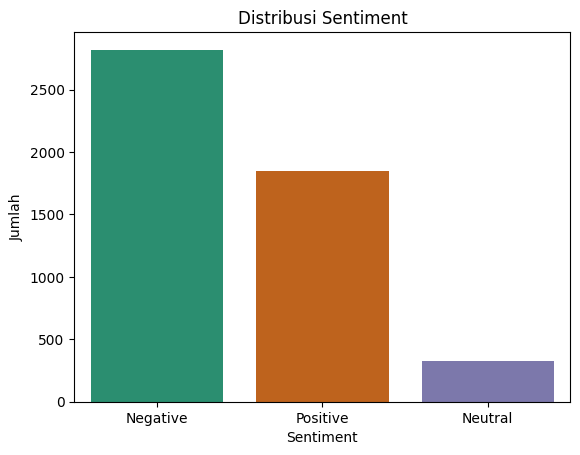

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = data['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Dark2')

plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentiment')
plt.show()

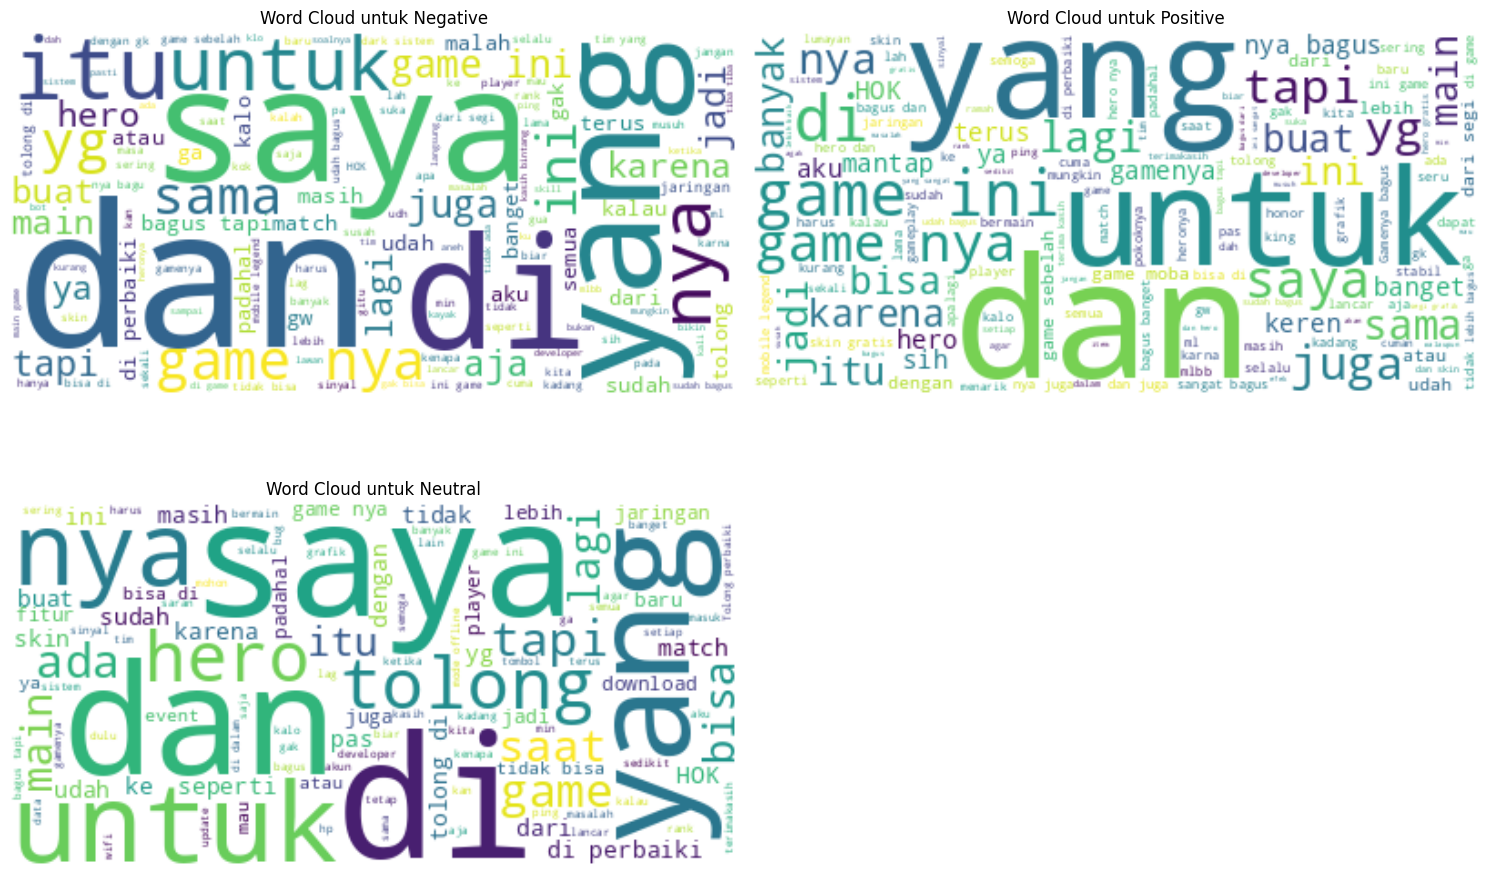

In [ ]:
from wordcloud import WordCloud

# Daftar kategori
labels = data['sentiment'].unique()

# Membuat Word Cloud untuk setiap kategori
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 2, i + 1)  # Mengatur layout subplot
    # Menggabungkan teks berdasarkan label
    category_text = ' '.join(data[data['sentiment'] == label]['content'])

    # Membuat Word Cloud
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(category_text)

    # Menampilkan Word Cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Menghilangkan sumbu
    plt.title(f'Word Cloud untuk {label.capitalize()}')

plt.tight_layout()
plt.show()